Bude zlobit "právní".

In [1]:
import os
import json
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import re

In [3]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [4]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [5]:
df = pd.read_json(os.path.join("data", "filmy.json"))
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")

## Obecná data

In [6]:
len(herectvo["Jméno"].drop_duplicates().to_list())

12115

In [7]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [8]:
len(zijici)

2979

In [9]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [10]:
len(veskere_herectvo)

38332

In [11]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [12]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     3.0
0.750     4.0
0.900    14.0
0.950    30.0
0.990    73.0
Name: Obsazovanost, dtype: float64

In [13]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [14]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     1.0
0.900     4.0
0.950     8.0
0.990    40.0
Name: Obsazovanost 2, dtype: float64

In [15]:
q = obsazovanost2.quantile(0.95)
q

8.0

In [16]:
q2 = obsazovanost2.quantile(0.98)
q2

23.0

## Nejdelší a nejplodnější kariéry

In [17]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [18]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno", how="outer")

In [19]:
hraji = hraji[hraji["Osoba"] != "právni"]

In [20]:
hraji

,Film,Copyright,Hrají,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Polední výstřel na Mariánských hradbách (401709),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cvičení s kužely Sokolů malostranských (401704),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyklisté (401705),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Defilování vojska o Božím těle na Královských ...,1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hanácké banderium (401707),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139548,NaN,NaN,NaN,Alexandra Sasínová (9996),9996,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
139549,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právní,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
139550,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právní,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
139551,NaN,NaN,NaN,Čechomor (person),person,None,právní,None,None,None,None,None,None,None,None,None,None,NaN,NaN


In [21]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

In [22]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Karel Dvořák                   82.0
Jiří Klečka                    82.0
neuvedeno                      79.0
Jiřina Bohdalová (2878)        79.0
František Kovářík (126912)     77.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Zita Kabátová (839)            73.0
Name: Délka kariéry, dtype: float64

In [23]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
Karel Dvořák                   82.0
neuvedeno                      79.0
Jiřina Bohdalová (2878)        79.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Josef Karel                    73.0
Černý                          73.0
Name: Délka kariéry, dtype: float64

In [24]:
hraji.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        281
Theodor Pištěk (37366)         254
Eman Fiala (64088)             214
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    166
Oldřich Velen (12725)          166
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [25]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937.0       21
Theodor Pištěk (37366)   1937.0       20
                         1938.0       20
Jan W. Speerger (55928)  1938.0       19
Karel Veverka (126788)   1937.0       19
Name: Film, dtype: int64

In [26]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [27]:
nejaktivnejsich500 = hraji.groupby("Copyright")["Film"].nunique().nlargest(500).index.to_list()

In [28]:
nejaktivnejsich500

[2019.0,
 2015.0,
 2018.0,
 1937.0,
 2016.0,
 1964.0,
 2017.0,
 1933.0,
 2013.0,
 2014.0,
 1965.0,
 1963.0,
 1935.0,
 1961.0,
 1938.0,
 2012.0,
 2011.0,
 1936.0,
 1966.0,
 1939.0,
 1959.0,
 2008.0,
 1934.0,
 1978.0,
 2009.0,
 1970.0,
 1969.0,
 1981.0,
 2020.0,
 1968.0,
 1962.0,
 1973.0,
 1974.0,
 1958.0,
 1929.0,
 1960.0,
 1955.0,
 1979.0,
 1982.0,
 1972.0,
 1980.0,
 1987.0,
 2021.0,
 1947.0,
 2010.0,
 1928.0,
 1932.0,
 1977.0,
 1971.0,
 1967.0,
 1989.0,
 1983.0,
 1976.0,
 1984.0,
 1921.0,
 1922.0,
 1957.0,
 1986.0,
 2000.0,
 1956.0,
 1990.0,
 1988.0,
 2002.0,
 1999.0,
 1919.0,
 1975.0,
 2006.0,
 1940.0,
 1926.0,
 1927.0,
 1931.0,
 1948.0,
 1985.0,
 1930.0,
 1952.0,
 1998.0,
 1953.0,
 2007.0,
 1949.0,
 1954.0,
 2004.0,
 1994.0,
 1995.0,
 2003.0,
 1944.0,
 2005.0,
 2001.0,
 1920.0,
 1941.0,
 1946.0,
 1996.0,
 1997.0,
 1942.0,
 1950.0,
 1925.0,
 1992.0,
 1993.0,
 1918.0,
 1898.0,
 1991.0,
 1913.0,
 1943.0,
 1923.0,
 1908.0,
 1951.0,
 1945.0,
 1924.0,
 1911.0,
 1912.0,
 1914.0,
 2022.0,
 

<AxesSubplot:xlabel='Copyright'>

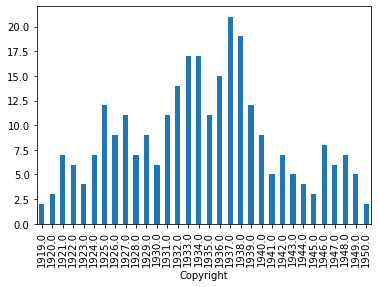

In [29]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [30]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            116
Jiří Lábus (838)              100
Jan Přeučil (4990)             93
Karel Hábl (27177)             92
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Jiřina Bohdalová (2878)        76
Jitka Zelenohorská (34821)     74
Ondřej Vetchý (836)            74
Name: Film, dtype: int64

In [31]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
24338,1937.0,Pižla a Žižla na cestách (395752),6.0
24339,1939.0,Zlatý člověk (395859),8.0
24340,1940.0,Babička (395928),9.0
24341,1940.0,Dceruška k pohledání (395926),9.0
24342,1940.0,Madla zpívá Evropě (395922),9.0
24343,1947.0,Muzikant (396045),16.0
24344,1952.0,Únos (396149),21.0
24345,1955.0,Direktiva (396228),24.0
24346,1955.0,Něco se tu změnilo (396202),24.0
24351,1956.0,Vina Vladimíra Olmera (396248),25.0


## Další rekordy

In [32]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Vladimír Zátka (128952)        16
Filip Renč (558)               15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [33]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Marta Fričová (127372)      9
Michal Koblic (128743)      9
Name: Film, dtype: int64

In [34]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         41
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Bohdan Lachman (128508)      34
Slávka Hamouzová (84688)     34
Name: Film, dtype: int64

## Kolegové

In [35]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [36]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [37]:
len(kolegove("Jiřina Bohdalová (2878)"))

1793

In [38]:
spoluherci = {}
for n in nejaktivnejsich500:
    spoluherci[n] = len(kolegove(n))
spoluherci = pd.Series(spoluherci)

In [39]:
spoluherci.sort_values(ascending=False).head(30)

2019.0    0
1998.0    0
1920.0    0
2001.0    0
2005.0    0
1944.0    0
2003.0    0
1995.0    0
1994.0    0
2004.0    0
1954.0    0
1949.0    0
2007.0    0
1953.0    0
1952.0    0
1946.0    0
1930.0    0
1985.0    0
1948.0    0
1931.0    0
1927.0    0
1926.0    0
1940.0    0
2006.0    0
1975.0    0
1919.0    0
1999.0    0
2002.0    0
1941.0    0
1996.0    0
dtype: int64

## Červí díry

In [40]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [41]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

[None,
 'Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [42]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo

[None,
 'Marie Novotná',
 'Jan Kačer (1165)',
 'Iva Janžurová (1049)',
 'Pavel Nový (510)',
 'Zdeněk Dušek (993)',
 'Jiří Navrátil',
 'Jan Martínek',
 'Petr Štěpánek (5406)',
 'Miroslav Vladyka (513)',
 'Václav Černý',
 'Taťjana Medvecká (7064)',
 'Boleslav Polívka (1556)',
 'Luděk Sobota (15687)',
 'Roman Skamene (6363)',
 'Ivo Strangmüller (4401)',
 'Daniela Kolářová (1847)',
 'Marie Čápová',
 'Jiří Bartoška (827)',
 'Jan Kuželka (1445)',
 'Václav Vydra nejml. (2666)',
 'Josef Lébr',
 'Jiří Lábus (838)',
 'Alois Švehlík (6277)',
 'Zuzana Bydžovská (4683)',
 'Jiří Balvín',
 'Otakar Brousek ml. (2989)',
 'Jan Pospíšil',
 'Milan Šteindler (1572)',
 'František Ringo Čech (11726)',
 'Uršula Kluková (12475)',
 'Vlasta Žehrová (2776)',
 'Rostislav Novák st. (40328)',
 'Tomáš Jirsa',
 'Daniela Vacková (27460)',
 'Tomáš Hanák (198)',
 'Vlastimil Venclík (27245)',
 'Petr Drozda (1502)',
 'Miroslav Donutil (7954)',
 'Pavel Zatloukal (1580)',
 'Vladimír Hauser (12684)',
 'Martin Havelka (28167)'

In [43]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    spolu = kolegove(n)
    for x in prvni_herectvo:
        if x in spolu:
            for y in posledni_herectvo:
                if y in spolu:
                    print(f"{n}, {x}, {y}")
                    n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                    y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                    z_filmy = []
                    for nf in n_filmy:
                        if nf in y_filmy:
                            z_filmy.append(nf)
                            cervi_filmy.append(nf)
                    print(z_filmy)
                    print("***")
                    if n not in cervi_diry:
                        cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Údolí včel (396722)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), 

['Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Luděk Sobota (15687)
['Ještě větší blbec, než jsme doufali (7782)', 'Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Roman Skamene (6363)
['Ještě větší blbec, než jsme doufali (7782)', 'Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Jiří Lábus (838)
['Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Jiří Langmajer (2981)
['Ještě větší blbec, než jsme doufali (7782)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Martin Hub (7650)
['Ještě větší blbec, než jsme doufali (7782)']
***
Zdeněk Štěpánek (87457), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Znamení Raka (396675)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Miroslav Vladyka (513)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostran

In [44]:
cervi_diry

['Jarmila Kronbauerová (128121)',
 'Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'Eman Fiala (64088)',
 'Antonín Meisner (127732)',
 'L. H. Struna (126711)',
 'Jan W. Speerger (55928)',
 'Marta Májová (127723)',
 'Václav Vydra ml. (126535)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'František Smolík (126955)',
 'Robert Ford (128037)',
 'Vladimír Hlavatý (34999)',
 'Anna Gabrielová (4949)',
 'Alois Dvorský (127491)',
 'Václav Wasserman (37326)',
 'Jára Kohout (4846)',
 'Zdeněk Štěpánek (87457)',
 'Jan Novák',
 'Jiří Hron (127679)',
 'Jarmila Novotná (4852)',
 'Jaroslav Marvan (9550)',
 'Darja Hajská (35228)',
 'F. X. Mlejnek (128287)',
 'František Jerhot (127303)',
 'Ela Poznerová (126572)',
 'neuvedeno',
 'Frank Argus (28475)',
 'Marie Nademlejnská (127317)',
 'Slávka Doležalová-Kulhavá (84685)',
 'Josef Steigl (128760)',
 'František Říha (25336)',
 'Ferdinand Jarkovský (127290)',
 'Ela Šárková (126039)',
 'Světla Svozilová (126470)',
 'Bohdan Lachman (128508)',
 'Nataša 

In [45]:
cervi_diry_ciste = []
for c in cervi_diry:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

Jarmila Kronbauerová, Bedřich Vrbský, František Kovářík, Eman Fiala, Antonín Meisner, L. H. Struna, Jan W. Speerger, Marta Májová, Václav Vydra ml., Gabriela Bártlová-Buddeusová, František Smolík, Robert Ford, Vladimír Hlavatý, Anna Gabrielová, Alois Dvorský, Václav Wasserman, Jára Kohout, Zdeněk Štěpánek, Jan Novák, Jiří Hron, Jarmila Novotná, Jaroslav Marvan, Darja Hajská, F. X. Mlejnek, František Jerhot, Ela Poznerová, neuvedeno, Frank Argus, Marie Nademlejnská, Slávka Doležalová-Kulhavá, Josef Steigl, František Říha, Ferdinand Jarkovský, Ela Šárková, Světla Svozilová, Bohdan Lachman, Nataša Gollová


In [46]:
len(cervi_diry)

37

In [47]:
cervi_filmy

['Čintamani & podvodník (396606)',
 'Čintamani & podvodník (396606)',
 'Údolí včel (396722)',
 'Velká neznámá (396861)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Kuřata na cestách (396497)',
 'Údolí včel (396722)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Na samotě u lesa (397110)',
 'Vítězný lid (397143)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Pasťák (397661)',
 'Faunovo velmi pozdní odpoledne (397404)',
 'Hledá se táta! (396457)',
 'Handlíři (396548)',
 'Volejte Martina (396639)',
 'U telefonu Martin (396686)',
 'U telefonu Martin (396686)',
 'Akce v Istanbulu (397084)',
 'Handlíři (396548)',
 'Tátova škola (396561)',
 'Tátova škola (396561)',
 'Zbraně pro Prahu (397041)',
 'Zbraně pro Prahu (397041)',
 'Skřivánčí píseň (395598)',
 'Handlíři (396548)',
 'Zabil jsem Einsteina, pánové... (396812)',
 'Dvanáct (396607)',
 'Místenka bez návratu (396596)',
 '„Pane, vy jste vdova!“ (396881)',
 'Volejte Martina (396639)',
 'Smrt na černo (397105)',
 'Smrt na černo (397105)',
 'Skřiv

In [48]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

Copyright
1916.0    1966.0
1918.0    1975.0
1924.0    1977.0
1919.0    1980.0
1920.0    1980.0
           ...  
1957.0    1996.0
1956.0    1996.0
1936.0    1996.0
1939.0    1996.0
2005.0       NaN
Name: Rok úmrtí, Length: 77, dtype: float64

## Nejvíc oskarových filmů

In [49]:
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [50]:
df[df["Film"].isin(seznamy["oskari"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Adam Matejka (126967)      1
Alois Vachek (130102)      1
Alojz Kramár               1
Andrej Chalimon (37311)    1
Andrej Šilan (59766)       1
Name: Film, dtype: int64

In [51]:
df[df["Film"].isin(seznamy["oskarianominace"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Antonín Blažejovský         2
Jan Tříska (4834)           2
Name: Film, dtype: int64

In [52]:
df[(df["Film"].isin(seznamy["oskarianominace"]) & (df["Hrají"] == "Milada Ježková (79014)"))]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role,Spoluherectvo
1975,Lásky jedné plavovlásky (396651),Československo,1965,1965,festivalová premiéra srpen 1965 (26. mezináro...,77.0,[Miloš Forman (7872)],film,"[komedie, hořká komedie]","[hraný, distribuční]",Lásky jedné plavovlásky,Lásky jedné plavovlásky,Loves of a Blonde,None,Přihořívá / Láska jako prám,Milada Ježková (79014),"[Andula, klavírista Míla Vašata, záložák Vacov...",[Ivan Passer (7890)],None,"[Jaroslav Papoušek (4930), Ivan Passer (7890),...","[Jaroslav Papoušek (4930), Ivan Passer (7890),...",[Václav Šašek (1766)],[Miroslav Ondříček (3524)],[Rudolf Blaháček (14330)],[Karel Černý (1241)],None,[Rudolf Hammer (5119)],[Miroslav Hájek (54607)],[Adolf Böhm (126000)],None,[Rudolf Hájek (12756)],"[Jaroslav Solnička (85467), Otakar Jiříček]",None,[27434],None,[],Filmová komedie se sestrou Jany Brejchové v hl...,[96664],None,[124966],"[106116, 92324]",dlouhometrážní,"[16mm, 35mm, DCP 2-D, BRD]",1.37,černobílý,zvukový,mono,česká,česky,bez titulků,české,Druhý celovečerní film Miloše Formana (natočen...,"Dívka s kytarou zpívá šlágr To, co bylo včera,...",[Miloš Forman (7872)],None,None,None,None,None,None,[6661],None,2195.0,None,[Vítěz Akce: Anketa filmových kritiků o nejlep...,Národní filmový archiv archivuje také 9. díl N...,None,None,None,None,None,None,None,None,None,None,None,"[2852, 22453, 8166, 7217, 129618, 2858, 2930, ...",None,None,"[Vladimír Mácha (127847), Vladimír Mácha, Rudo...","[Pavla Marková (36607), Jaromír Komárek (22275...",None,None,[Ladislav Chroust (59307)],None,None,None,None,"[Muži z Ria, Smích /Chi Chi/, Hej, panímámo, T...","[Jindřich Brabec (5311), Vokální soubor Lubomí...",schválení literárního scénáře 13. 5. 1964 ...,None,None,None,None,None,None,bez ateliérů,None,None,None,None,None,None,None,None,None,None,None,[Miloš Červinka (31108)],None,None,[Jaroslav Vlk (130440)],[Lilian Havlíčková (66986)],"[Zdena Šnajdarová (31117), Emilie Fišarová (20...",[Jitka Šulcová (129636)],None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Tvůrčí skupina Šebor – Bor, Vladimír Bor (vedo...",None,None,None,None,None,None,None,1965,1965,"[Hana Brejchová (81393), Vladimír Pucholt (222...","[Ivan Kheil, Jiří Hrubý (59333), Milada Ježkov...","[Hana Brejchová (81393), Vladimír Pucholt (222..

## Hlavní a vedlejší role

In [53]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [54]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [55]:
hvezdy

,Hvězdnost,Obsazovanost
100597,NaN,NaN
101659,NaN,NaN
101660,NaN,NaN
108376,NaN,NaN
110277,NaN,NaN
...,...,...
Teresa Churcher (22724),NaN,1.0
Timothy Bateson (22712),NaN,1.0
Tony Noble (22721),NaN,1.0
Zuzana Fréharová (27341),NaN,1.0


In [56]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(50)

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.974359,40.0
Suzanne Marwille (127373),0.900000,37.0
Rolf Wanka (56226),0.842105,18.0
Jaroslav Vízner (27247),0.777778,9.0
Juraj Kukura (9694),0.769231,13.0
Růžena Nasková (127316),0.769231,13.0
Hugo Haas (37289),0.766667,30.0
Jan Werich (1287),0.761905,21.0
Anny Ondráková (127280),0.756757,35.0
Oskar Marion (128284),0.750000,8.0


In [57]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

50
Vlasta Burian, Suzanne Marwille, Rolf Wanka, Jaroslav Vízner, Růžena Nasková, Juraj Kukura, Hugo Haas, Jan Werich, Anny Ondráková, Oskar Marion, Štefan Kvietik, V. Ch. Vladimírov, Veronika Renčová, Karel Lamač, Josef Filip, Karel Höger, Karel Roden nejml., Lexa Jarošín, Anna Geislerová, Július Pántik, Václav Norman, Lída Baarová, Jana Brejchová, Jan Dolanský, Zdeněk Štěpánek, Oldřich Nový, Jiří Voskovec, Bronislav Križan, Judit Bárdos, Emil Artur Longen, Hana Vítová, Vlasta Matulová, Gustáv Valach, Tatiana Vilhelmová, Leopolda Dostalová, Tomáš Holý, Nina Laušmanová, Magda Vášáryová, Jiří Mádl, Vojtěch Kotek, Eva Gerová, Jiří Vala, Klára Issová, Božidara Turzonovová, Karel Hašler, Erik Pardus, Ivan Trojan, Jaromír Hanzlík, Eduard Cupák, Otomar Korbelář


In [58]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by=["Hvězdnost","Obsazovanost"], ascending=False).head(50)

,Hvězdnost,Obsazovanost
Juraj Kukura (9694),0.769231,13.0
Štefan Kvietik (64266),0.714286,8.0
Veronika Renčová (128659),0.700000,10.0
Josef Filip (127149),0.692308,13.0
Karel Roden nejml. (494),0.679245,54.0
Anna Geislerová (5433),0.666667,41.0
Jana Brejchová (7710),0.650000,60.0
Jan Dolanský (1091),0.647059,18.0
Judit Bárdos (75921),0.625000,8.0
Tatiana Vilhelmová (935),0.606061,34.0


In [59]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [60]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

['Zaostřit prosím! (396247)']

In [61]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,136.0
Vladimír Navrátil (12670),NaN,125.0
Jan Kuželka (1445),NaN,116.0
Jiřina Bílá (3629),NaN,115.0
Zdeněk Srstka (7960),NaN,108.0
Karel Bělohradský (6370),NaN,99.0
Jan Cmíral (125562),NaN,96.0
Jindřich Narenta (87097),NaN,96.0
Zdeněk Skalický (126510),NaN,93.0
Emanuel Hříbal (127758),NaN,93.0


In [62]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(710, 2)

In [63]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,151.0
Karel Engel (14390),0.009174,94.0
Josef Oliak (128024),0.010417,94.0
Alois Dvorský (127491),0.011834,169.0
Karel Pavlík (126439),0.012658,81.0
Miloslav Homola (18975),0.012821,77.0
Vlastimila Vlková (27109),0.013333,75.0
Viktor Maurer (78076),0.013889,75.0
F. X. Mlejnek (128287),0.015385,104.0
Karel Augusta (5058),0.015625,128.0


In [64]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

['Koncert (397284)']

## Typologie herců

In [65]:
df = df.explode("Žánr")

In [66]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [67]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [68]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [69]:
df.columns

Index(['Hrají', 'Hlavní role', 'Vedlejší role', 'Film', 'Žánr', 'Copyright',
       'Obsazovanost'],
      dtype='object')

In [70]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
anekdota: Hrají
Antonín Kachlík (7880)    1
Name: Film, dtype: int64
komedie: Hrají
Jan W. Speerger (55928)    117
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    47
Name: Film, dtype: int64
dobrodružný: Hrají
Radovan Lukavský (3301)    8
Name: Film, dtype: int64
historický: Hrají
Oldřich Velen (12725)    20
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
pohádka: Hrají
Jan Skopeček (8252)    10
Name: Film, dtype: int64
osvětový: Hrají
František Šlégr (127637)    4
Name: Film, dtype: int64
tragikomedie: Hrají
Jiří Menzel (7887)    8
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
špionážní: Hrají
Jan Pohan (7665)    5
Name: Film, dtype: int64
hudební: Hrají
Karel Hovorka

In [71]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q2)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

fraška
Hrají
Josef Waltner (126405)             0.138889
Ada Karlovský (85828)              0.128205
Jindřich Adolf (13279)             0.111111
Josef Sládek (18352)               0.111111
Alfred Baštýř (28814)              0.108108
František Beranský (49046)         0.090909
Mario Karas (101579)               0.088235
Josef Rovenský (37766)             0.084507
Josef Šváb-Malostranský (55291)    0.082192
Karel Němec (128590)               0.081967
dtype: float64
***
anekdota
Hrají
Jan Víšek (4757)             0.037037
Vladimír Klemens (128722)    0.034483
Pavla Maršálková (126529)    0.029412
Ilona Jirotková (126679)     0.027027
Tomáš Hanák (198)            0.025000
Jiřina Šejbalová (125559)    0.023256
František Kubíček (87096)    0.020833
Pavel Landovský (1136)       0.020000
Marta Richterová (27358)     0.019608
Jiřina Jirásková (22836)     0.018182
dtype: float64
***
komedie
Hrají
Vlasta Burian (11992)        0.850000
Hugo Haas (37289)            0.800000
Jára Kohout (4846)      

detektivní
Hrají
Božena Böhmová (27878)                   0.166667
Miloš Willig (82925)                     0.145455
Bohumil Šmída (31114)                    0.127660
Hana Pastejříková (6130)                 0.125000
Václav Wasserman (37326)                 0.121212
Vladimír Ptáček (126428)                 0.116279
Anna Gabrielová (4949)                   0.115385
Gabriela Bártlová-Buddeusová (127814)    0.109091
Jan Maška (126431)                       0.108108
Jiří Němeček (4964)                      0.108108
dtype: float64
***
trikový
Hrají
Miroslav Krobot (21995)    0.043478
Václav Neužil (9101)       0.040000
Jaromír Nosek (585)        0.038462
Nela Boudová (8226)        0.037037
Pavel Liška (984)          0.035714
Arnošt Goldflam (1579)     0.031250
Jarka Pižla (128001)       0.031250
Jan Vondráček (1713)       0.028571
Miloslav Holub (5166)      0.027778
Jan Budař (11090)          0.025641
dtype: float64
***
sociální
Hrají
Frank Rose-Růžička (127740)    0.083333
Oleg Reif (7964)

dětský
Hrají
Eva Matalová (2375)          0.391304
Otto Šimánek (35353)         0.308824
Stanislav Tříska (4976)      0.300000
Michael Hofbauer (13613)     0.291667
Václav Babka (28480)         0.220000
Filip Renč (558)             0.200000
Karel Smyczek (611)          0.200000
Otakar Brousek ml. (2989)    0.200000
Pavlína Mourková (2667)      0.200000
Václav Halama (21254)        0.185185
dtype: float64
***
rodinný
Hrají
Václav Neužil (9101)        0.120000
Hynek Čermák (3370)         0.115385
Matěj Hádek (11532)         0.107143
Marek Taclík (9420)         0.096774
Martin Faltýn (6096)        0.086957
Otmar Brancuzský (1063)     0.086957
Vanda Hybnerová (937)       0.086957
Naďa Konvalinková (4988)    0.083333
Jana Štěpánková (14419)     0.078947
Ivan Trojan (6789)          0.076923
dtype: float64
***
muzikál
Hrají
Milan Kindl (126442)          0.119048
Oskar Hák (7589)              0.114286
Bert Schneider (126653)       0.103448
Marie Popelková (35279)       0.068966
Jiří Bruder (12

reportáž
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aanshal Batnagar (36659)        NaN
Aaron Monaghan (59068)          NaN
Aaron Thomas (33669)            NaN
dtype: float64
***
erotický
Hrají
Jiří Pomeje (3876)          0.125000
Michaela Kuklová (3313)     0.086957
Oldřich Vízner (8257)       0.060606
Pavel Pípal (6302)          0.043478
Václav Knop (12652)         0.041667
Blanka Lormanová (14388)    0.040000
Dana Syslová (52427)        0.038462
Jaromír Nosek (585)         0.038462
Nela Boudová (8226)         0.037037
Hanuš Bor (7070)            0.035714
dtype: float64
***
milostný
Hrají
Kryštof Hádek (1830)       0.117647
Miroslav Krobot (21995)    0.086957
Ondřej Malý (59148)        0.081081
Jiří Mádl (18965)          0.074074
Karel Dobrý (6362)         0.074074
Leoš No

výukový
Hrají
Miroslav Krobot (21995)          0.043478
Pavel Liška (984)                0.035714
A. M. Brousil (127207)                NaN
A. Pahl (21791)                       NaN
A. Pokorný (21836)                    NaN
A. Ryzák (19930)                      NaN
A. V. Frič (104959)                   NaN
A. V. Jarol-Jarolímek (51927)         NaN
A. Černá (44606)                      NaN
Aanshal Batnagar (36659)              NaN
dtype: float64
***
medailon
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aanshal Batnagar (36659)        NaN
Aaron Monaghan (59068)          NaN
Aaron Thomas (33669)            NaN
dtype: float64
***
videoklip
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)             

In [72]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

Hrají
František Filipovský (4735)    38
Jaroslav Tomsa (2576)          38
Josef Kemr (4897)              38
Josef Hlinomaz (26212)         37
Eman Fiala (64088)             34
Name: Žánr, dtype: int64

In [73]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()

Hlavní role
Karel Roden nejml. (494)       23
Miloš Kopecký (4959)           22
Jana Brejchová (7710)          21
Rudolf Hrušínský st. (4842)    21
Iva Janžurová (1049)           20
Name: Žánr, dtype: int64